In [27]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
%matplotlib inline

First, beautify spectra at MestReNova and save them. Then, put them into this folder:

In [2]:
FNAMES = ["MV_Glc_Trp", "MV_Glc_Trp_HSA"]
data = [None for _ in FNAMES]

In [3]:
for i, fname in enumerate(FNAMES):
    # data head: ppm | real | imag
    data[i] = np.genfromtxt(f"Spectra/{fname}.csv", delimiter="\t")

Let's look at the data:

In [4]:
data[0].shape

(131072, 3)

Now we add weighted values:

In [77]:
# np.append(
#     data,
#     np.reshape(np.sqrt(data[:, :, 1]**2 + data[:, :, 1]**2), data.shape[:-1] + (1,)),
#     axis=2
# )

Let's have a look:

perhaps should revert to matrices...

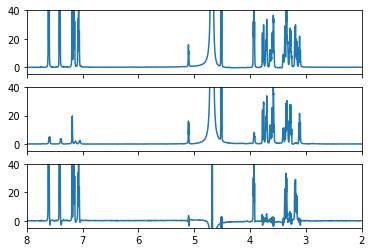

In [28]:
f, axarr = plt.subplots(3, sharex=True, sharey=True)
plt.xlim([2, 8])
plt.ylim([-5, 40])
plt.gca().invert_xaxis()
X = 11
axarr[0].plot(data[0][:, 0], data[0][:, 1])
axarr[1].plot(data[1][:, 0], np.roll(data[1][:, 1], shift=X))
axarr[2].plot(data[0][:, 0], data[0][:, 1] - np.roll(data[1][:, 1], shift=X))
plt.plot();

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [38]:
def f(shift, save=False, ylim=40):
    f, axarr = plt.subplots(3, 2, sharex=True, sharey=True)
    plt.tight_layout()
    plt.xlim([3, 4])
    plt.ylim([-5, ylim])
    plt.gca().invert_xaxis()
    axarr[0, 1].plot(data[0][:, 0], data[0][:, 1], color='k', linewidth=0.5)
    axarr[1, 1].plot(data[1][:, 0], np.roll(data[1][:, 1], shift=shift), color='k', linewidth=0.5)
    axarr[2, 1].plot(data[0][:, 0], data[0][:, 1] - np.roll(data[1][:, 1], shift=shift), color='k', linewidth=0.5)
    plt.xlabel('f1 (ppm)')
    if save:
        plt.savefig('plot.png', dpi=300)
    plt.show()
    return

In [31]:
plt.rcParams["figure.figsize"] = [7.0, 4.0]

In [39]:
interact(
    f,
    shift=widgets.IntSlider(min=-10,max=20,step=1,value=11),
    ylim=widgets.IntSlider(min=10,max=101,step=10,value=50)
);

interactive(children=(IntSlider(value=11, description='shift', max=20, min=-10), Checkbox(value=False, descrip…

s

In [ ]:
areas_of_interest = ((3., 4.), (7., 7.75))
